In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from functools import reduce
from scipy.linalg import sqrtm
from mpl_toolkits.mplot3d import Axes3D
import math
import sympy
from numpy.linalg import matrix_rank

In [4]:
### r_1 and r_2 is lower and upper bound for the distance of each point. ###
### (x_1,x_2) is the center. p is the number of points. ###

def circle(r_1,r_2,x_1,x_2,p):
    
    ### radius of the circle ###
    r = r_1 + ((r_2 - r_1) * np.random.random((p,1)))

    ### center of the circle (x, y) ###
    circle_x = x_1 
    circle_y = x_2
    
    ### random angle ###
    alpha = 2 * np.pi * np.random.random((p,1))
    
    ### calculating coordinates ###
    x = (r * np.cos(alpha) + circle_x).reshape((p, 1)) 
    y = (r * np.sin(alpha) + circle_y).reshape((p, 1))
    L = np.arange(p).reshape((p,1))
    
    data = np.concatenate((x, y, L), axis=1)
   
    
    return data;

def remove_duplicates(x):
    
    y = []
    
    for i in x:
        if i not in y:
            y.append(i)

    return y

[[ 1.1853343   2.65105946  0.        ]
 [-0.94564478 -2.57435712  1.        ]
 [-2.48166195  1.42361141  2.        ]
 [ 1.54826957  2.44454344  3.        ]
 [ 2.66872071  0.44536483  4.        ]
 [ 1.41921058  2.44167377  5.        ]
 [ 1.49261532 -2.59071291  6.        ]
 [-0.44872829 -2.76681744  7.        ]
 [-1.94629762  2.18285211  8.        ]
 [-1.2061833  -2.57853299  9.        ]
 [ 2.94490492  0.19975536 10.        ]
 [-2.50645746 -1.57117711 11.        ]
 [-0.69733957 -2.67001043 12.        ]
 [ 2.47694902  1.50339513 13.        ]
 [ 0.99748092  2.77634558 14.        ]
 [-0.66814337 -2.65515006 15.        ]
 [ 0.47110548  2.81011047 16.        ]
 [-1.45879779 -2.29205631 17.        ]
 [ 2.73389083 -0.31370869 18.        ]
 [-0.7098969  -2.61406656 19.        ]]


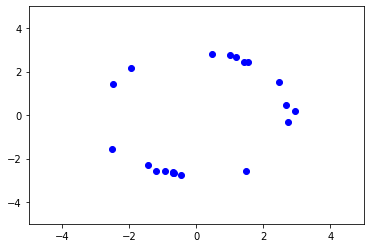

In [5]:
### Sample Data ###

Class_1 = circle(2.7,3,0,0,20)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.scatter(Class_1.T[0], Class_1.T[1], color="blue", label="points") 
 
print(Class_1)    
plt.show()

In [3]:
### V_d is the data set that contains (x_i,y_i) and label i. Radius is given in terms of e. 

def rc_one_simplex(V_d,e):
    
    edges = []
    x_cord = []
    y_cord = []
    
    dim = [x for x in range(len(V_d))]
    
### Check if vertices should be connected via an edge ###
    
    for i in dim:
        for j in dim:
            x_i = V_d[i][0]
            y_i = V_d[i][1]
            x_j = V_d[j][0]
            y_j = V_d[j][1]
            
### Compare Pairwise distances ##
            
            d = np.array([x_i,y_i])-np.array([x_j,y_j])
            if np.linalg.norm(d) < 2*e and np.linalg.norm(np.array(d)) > 0:
                
### Append edges into a list and plot line segments ###
            
                if i<j:
                    edges.append([i,j])
                    x_cord.extend([x_i,x_j])
                    y_cord.extend([y_i,y_j])
                    plt.plot([x_i,x_j], [y_i,y_j], 'ro-')
                    
                else:
                    edges.append([j,i])
                    x_cord.extend([x_j,x_i])
                    y_cord.extend([y_j,y_i])
                    plt.plot([x_j,x_i], [y_j,y_i], 'ro-')
                    
### Remove Duplicates ###           

    edges = remove_duplicates(edges)
    
    
    plt.show()
    
    return edges;


In [4]:
def simplex_decomposion(simplex):
    
    decompose = []

### Map a simplex from C_(l) -> C_(l-1) ###
    
    for i in range(len(simplex)):
        for j in simplex:
            if j != simplex[i]:
                decompose.append(j)
                
### Decompose n-simplex into (n-1)-simplex ###
                
    decompose = np.array_split(decompose, len(simplex))
    decompose = [list(i) for i in decompose]
    decompose = remove_duplicates(decompose)

    return decompose
            
        

In [5]:
def simplex_builder(simplicies):
    
    guess = []
    guess_update = []
    rand = []
    decomposition = []
    
### Gluing edges together to form larger simplicies ###
    
    for i in simplicies:
        for j in simplicies:
            if i != j:
                for k in range(1,len(i)):
                    if i[k] in j and i[k] not in rand:
                        rand.append(i[k])
                        rand.append(i[0])
                        rand.append(j[len(j)-1])
                    
### Reorganize larger simplicies ###

                    rand = remove_duplicates(rand)
                    rand.sort()
                    
                guess.append(rand)
                rand = []
                
### List of potential guess ###
                
    for i in guess:
        if len(i) == (len(simplicies[0])+1):
            guess_update.append(i)
    
    guess_update = remove_duplicates(guess_update)
    
### Check to see if the decomposition exists in the orignal list. If valid, included; else, remove. ###
    
    for i in guess_update:
        for j in simplex_decomposion(i):
            if j not in simplicies:
                guess_update.remove(i)
                break
                
                
    decomposition = remove_duplicates(guess_update)

    return decomposition

In [6]:
def Rips_Complex(times, data):
    
    result = []
    Complex = []
    
    skeleton = []
    skeleton.append(data)
    
### Result the one-complex ###

    if times == 1:
        result.append(data)
        
### Recursively builder larger simplicies using builder function and then append ###

    else:
        result.append(data)
        result.extend(Rips_Complex(times-1, simplex_builder(data)))
    for i in result:
        if (len(i) != 0) and (i not in Complex):
            Complex.append(i)
    
    return Complex;

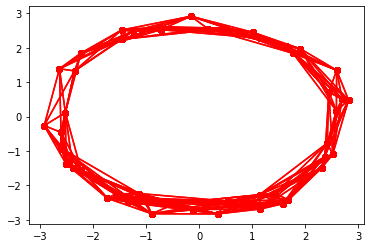

[[-1.25393582  2.47793355  0.        ]
 [-0.11928924 -2.69864774  1.        ]
 [ 0.34839893 -2.82591979  2.        ]
 [ 0.16013958  2.55465483  3.        ]
 [ 0.51070199  2.56695067  4.        ]
 [ 2.36715644 -1.1628844   5.        ]
 [-2.22769549  1.84243784  6.        ]
 [-2.52099794  0.11351429  7.        ]
 [ 1.90512144  1.97096583  8.        ]
 [-2.60881606 -0.86666887  9.        ]
 [-2.57849417 -0.93929152 10.        ]
 [ 0.87790953 -2.56266154 11.        ]
 [ 1.15512169 -2.68302028 12.        ]
 [ 2.41251762 -0.76837333 13.        ]
 [-2.22366968 -1.55504048 14.        ]
 [ 1.76886497  1.83866316 15.        ]
 [ 1.43399503 -2.22902608 16.        ]
 [ 1.68166498 -2.4203627  17.        ]
 [ 1.14038717 -2.26722789 18.        ]
 [-1.728489   -2.37244622 19.        ]
 [ 2.69407579  0.50156562 20.        ]
 [ 1.14645965  2.27749719 21.        ]
 [ 2.51532379 -1.09907964 22.        ]
 [ 2.58561225  0.16940219 23.        ]
 [-1.46181491  2.51305583 24.        ]
 [ 1.57793436 -2.53042691

In [10]:
### Dataset ###

Class_1 = circle(2.5,3,0,0,50)



### The Skeleton ###

x = rc_one_simplex(Class_1, 1)

### For smaller complex set size < len(x). ###
### Else, for the entire simplical complex set times = len(x). ###

RC = Rips_Complex(2,x)

print(Class_1)

print(RC)

In [9]:
def boundary_maps(RC):
    
    l = len(RC)
    
    boundary_maps = []
    
    vertex = []

    for i in range(len(RC[0])):
        for j in range(2):
            if [RC[0][i][j]] not in vertex:
                vertex.append([RC[0][i][j]])

    RC.insert(0, vertex)

    for i in range(l):
        boundary_matrix = [ [ 0 for j in range(len(RC[i+1])) ] for k in range(len(RC[i])) ]
        
        for m in range(len(RC[i])):
            for n in range(len(RC[i+1])):
                if RC[i][m] in simplex_decomposion(RC[i+1][n]):
                    boundary_matrix[m][n] = 1
                    
        boundary_maps.append(boundary_matrix)
        
    
    return boundary_maps

In [22]:
x = boundary_maps(RC)

In [10]:
%%bash
git clone https://github.com/sauln/smith-normal-form.git

fatal: destination path 'smith-normal-form' already exists and is not an empty directory.


CalledProcessError: Command 'b'git clone https://github.com/sauln/smith-normal-form.git\n'' returned non-zero exit status 128.

In [11]:
from snf import SmithNormalForm

ModuleNotFoundError: No module named 'snf'

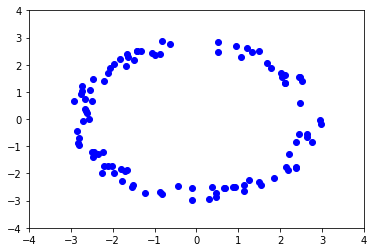

In [25]:
### Dataset ###

Class_1 = circle(2.5,3,0,0,100)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(Class_1.T[0], Class_1.T[1], color="blue", label="points") 
 
    
plt.show()

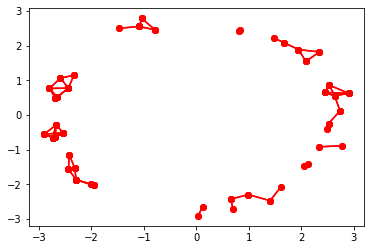

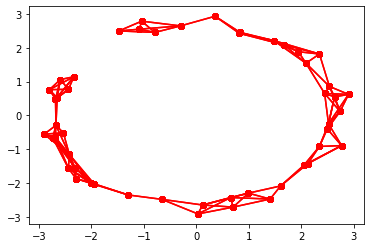

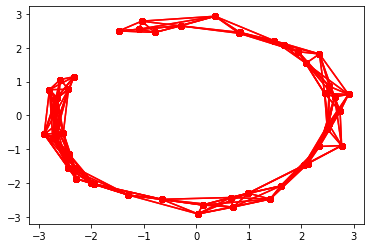

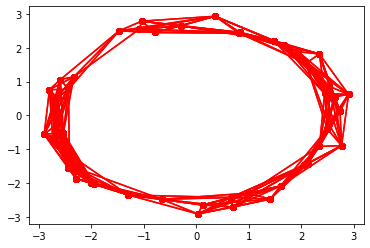

In [21]:
### The Skeleton ###

y = [0.25, 0.5, 0.75, 1]

for i in y:

    x = rc_one_simplex(Class_1, i)

    ### For smaller complex set size < len(x). ###
    ### Else, for the entire simplical complex set times = len(x). ###

    RC = Rips_Complex(2,x)

In [28]:
x = [1,2,3]

simplex_decomposion(x)

[[2, 3], [1, 3], [1, 2]]

In [11]:
def class_4(x):
    
    if x == 3:
        print('True')
    else:
        print('False')

In [12]:
class_4(4)

False
